<a href="https://colab.research.google.com/github/Bao3333/MachineLearning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0826/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")
url = "https://github.com/Elwing-Chou/tibaml0826/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")

('train.csv', <http.client.HTTPMessage at 0x7f8876cb9050>)

In [ ]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
predict = pd.read_csv("test.csv", encoding="utf-8")

In [ ]:
# 合併在一起一起做,之後再分開
combine = pd.concat([datas, predict], axis = 0, ignore_index=True)
combine = combine.drop(["PassengerId", "Survived"], axis=1)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#        ↓看一下有沒有缺值,再用sum加總(axis=0)
s = combine.isna().sum()
# 將不是0的篩選掉並用降續排列
s[s > 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [ ]:
# ↑程式碼解說：Series的篩選操作 Series[[跟妳資料筆數一樣多的True/False]]
s = pd.Series([-1, 2, 3])

# 寫法1
s[[False, True, False]]
# 寫法2
s[s >= 0]
# 寫法3
s[s.apply(lambda x:x>=0)]

1    2
2    3
dtype: int64

In [ ]:
# 處理Cabin資料(詳見下方資料預處理說明)
def cabin(c):
  if not pd.isna(c):
    return c[0]
  else:
    return None

combine["Cabin"] = combine["Cabin"].apply(cabin)
combine["Cabin"]

0       None
1          C
2       None
3          C
4       None
        ... 
1304    None
1305       C
1306    None
1307    None
1308    None
Name: Cabin, Length: 1309, dtype: object

In [ ]:
# 處理Name資料(詳見下方資料預處理說明)
def name(s):
  return s.split(",")[-1].split(".")[0].strip()
combine["Name"] = combine["Name"].apply(name)

In [ ]:
# 處理Ticket資料(詳見下方資料預處理說明)
count = combine["Ticket"].value_counts()
def ticket(t):
  if not pd.isna(t):
    return count[t]
  else:
    return None
combine["Ticket"] = combine["Ticket"].apply(ticket)
combine

1     713
2     264
3     147
4      64
5      35
7      35
6      24
8      16
11     11
Name: Ticket, dtype: int64


,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,713,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,264,71.2833,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,713,7.9250,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,264,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,713,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,713,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,147,108.9000,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,713,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,713,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
# 資料預處理
# 1把空的資料填上
  # 欄位分成兩種: 
  # a. 類別: 只有固定數種的
  # Pclass, Name(mid,稱謂有可能影響), Sex, Cabin(first,船艙內位置有可能影響), Embarked
  # b. 數值: 大小關係, 無限可能
  # Age, SibSp, Parch, Ticket(count,票號有可能顯示和誰一起上船有可能是沒有血緣關係的朋友), Fare
  # 補準則: 補最可能的
  # a. 類別: 最常出現的
  # b. 數值(中庸值): 中位數

In [ ]:

most = combine["Embarked"].value_counts().idxmax()
combine["Embarked"] = combine["Embarked"].fillna(most)

In [ ]:
# df.fillna({"欄位名稱":要填的值}) <- DataFrame的fillna可以直接字典,他會全部幫你補上
#                               ↓這是類別,不補中位數
med = combine.median().drop("Pclass")
combine = combine.fillna(med)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 檢查缺失值填補的狀況
s = combine.isna().sum()
s[s > 0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [ ]:
# 資料預處理
# 2. One-Hot Encoding: 多個是非題(丟到sklearn, 所有格子內東西不能是字串了)
# NaN: 0 0 0 -> 空值可以不用補缺失, 直接用One-Hot Encoding做
# 裡面東西很多種: 絕對要做, 沒有不做道理
# 1. 對欄位沒處理好: 汽車型號 -> 汽車廠牌(One-Hot)/價錢/是不是休旅車/是不是跑車/幾門/有沒有天窗/馬力
# 2. 欄位真的比較多個(Name): 直接做沒問題, 因為決策樹本來就會選擇他覺得重要的欄位
# 我會做處理是因為 好看度/後續使用者填的時候根本不需要填
# 所以你可以捨去出現率太過稀少的值

In [ ]:
# 只保留master以上, 其他當成None -> 0 0 0
count = combine["Name"].value_counts()
reserved = count[count > 50].index
def name2(n):
  if n in reserved:
    return n
  else:
    return None
combine["Name"] = combine["Name"].apply(name2)

In [ ]:
# 可以不做One-Hot?
# Pclass: 可以不做, 因為你要說他有大小關係是可以的
# Sex: 可以不做, 因為他是二值型

#              ↓系統會自行將類別去做One-Hot
combine = pd.get_dummies(combine)
#              ↓Pclass因為不是類別所以沒做到,特別抓出來做
combine = pd.get_dummies(combine, columns=["Pclass"])

In [ ]:
# 3. 看一下可不可以額外萃取出資訊(覺得合理才做)
# 我沒試過: Friend = max(0, Ticket - Family) / 船艙上中下半部 / married
combine["Family"] = combine["SibSp"] + combine["Parch"]

In [ ]:
import numpy as np
x = np.array(combine.iloc[:len(datas)])
y = np.array(datas["Survived"])
predict_x = np.array(combine.iloc[len(datas):])
print(x.shape)
print(y.shape)
print(predict_x.shape)

(891, 26)
(891,)
(418, 26)


In [ ]:
# 讓sklearn幫你把下面那格做很多次, 找出最佳參數
# 透過GridSearchCV進行參數的交叉比對
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params = {
    "max_depth":range(5,11),
    "n_estimators":(21, 101, 2)
}
clf = RandomForestClassifier()
#                                   ↓要分成幾分做交叉驗證 
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
#                                             ↑決定要用來計算的核心數量(-1代表可以的全部都用)
search.fit(x,y)

print(search.best_score_)
print(search.best_params_)

0.8429088639200998
{'max_depth': 9, 'n_estimators': 21}


In [ ]:
# 交叉驗證(對樣本進行多次的tain_test_split以免取樣的誤差)＆隨機森林(進行多次的決策樹降低判斷誤差,每次只取樣本的固定比例製以求造出不同的模型觀點)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=101, max_depth=7)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.82222222 0.86516854 0.73033708 0.88764045 0.87640449 0.83146067
 0.85393258 0.78651685 0.87640449 0.80898876]
0.8339076154806492


[Text(0.4230769230769231, 0.875, 'Age <= 5.5\ngini = 0.47\nsamples = 556\nvalue = [554, 337]'),
 Text(0.15384615384615385, 0.625, 'Fare <= 20.167\ngini = 0.399\nsamples = 27\nvalue = [11, 29]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [0, 14]'),
 Text(0.23076923076923078, 0.375, 'Embarked_Q <= 0.5\ngini = 0.488\nsamples = 18\nvalue = [11, 15]'),
 Text(0.15384615384615385, 0.125, '\n  (...)  \n'),
 Text(0.3076923076923077, 0.125, '\n  (...)  \n'),
 Text(0.6923076923076923, 0.625, 'Sex_male <= 0.5\ngini = 0.462\nsamples = 529\nvalue = [543, 308]'),
 Text(0.5384615384615384, 0.375, 'Pclass_1 <= 0.5\ngini = 0.383\nsamples = 179\nvalue = [76, 218]'),
 Text(0.46153846153846156, 0.125, '\n  (...)  \n'),
 Text(0.6153846153846154, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.375, 'Cabin_E <= 0.5\ngini = 0.271\nsamples = 350\nvalue = [467, 90]'),
 Text(0.7692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 0.125, '\n  (...)  \n')]

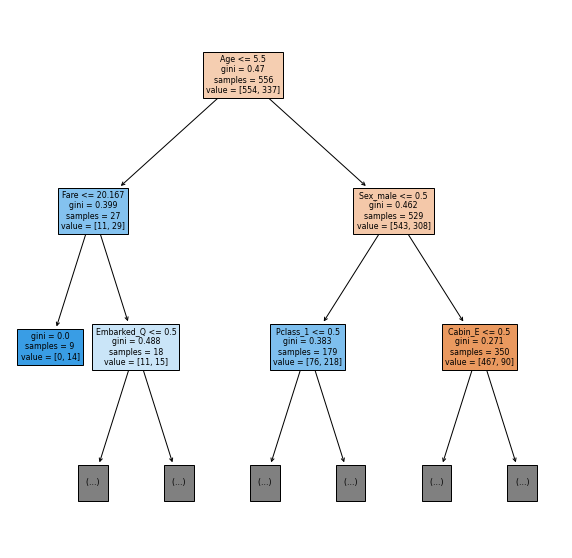

In [ ]:
# 看隨機森林裡面的樹長怎樣
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
clf = RandomForestClassifier(n_estimators=31, max_depth=7)
clf.fit(x, y)
plt.figure(figsize=(10, 10))
plot_tree(clf.estimators_[0], 
     feature_names=combine.columns,
     filled=True,
     max_depth=2)

In [ ]:
clf = RandomForestClassifier(n_estimators=31, max_depth=7)
clf.fit(x, y)
pre = clf.predict(predict_x)
result = pd.DataFrame({
    "PassengerId":predict["PassengerId"],
    "Survived":pre
})
print(result)
result.to_csv("rf0908.csv", encoding="utf-8", index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [ ]:
# 另外一種演算法 -> knn(尋找離預測點最近的K個點來推測答案) -> 為避免資料的數值大小差異過大所以需要先做scaling
from sklearn.preprocessing import MinMaxScaler
# 先設定最大最小值的範圍(預設為0,1)
print(combine)
scaler = MinMaxScaler()
combine_scale = scaler.fit_transform(combine)

       Age  SibSp  Parch  Ticket      Fare  Name_Master  Name_Miss  Name_Mr  \
0     22.0      1      0       1    7.2500            0          0        1   
1     38.0      1      0       2   71.2833            0          0        0   
2     26.0      0      0       1    7.9250            0          1        0   
3     35.0      1      0       2   53.1000            0          0        0   
4     35.0      0      0       1    8.0500            0          0        1   
...    ...    ...    ...     ...       ...          ...        ...      ...   
1304  28.0      0      0       1    8.0500            0          0        1   
1305  39.0      0      0       3  108.9000            0          0        0   
1306  38.5      0      0       1    7.2500            0          0        1   
1307  28.0      0      0       1    8.0500            0          0        1   
1308  28.0      1      1       3   22.3583            1          0        0   

      Name_Mrs  Sex_female  ...  Cabin_F  Cabin_G  

In [ ]:
# np array 就不用.iloc了
# y 本來就是0,1所以用舊的即可
x_scale = np.array(combine_scale[:len(datas)])
predict_x_scale = np.array(combine_scale[len(datas):])

In [ ]:
# 找knn最佳參數
from sklearn.neighbors import KNeighborsClassifier
params = {
    "n_neighbors":range(2, 200)
}
clf = KNeighborsClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scale, y)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [ ]:
# 雖然上面找的是7, 但老師試過 11->best
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_scale, y)
pre = clf.predict(predict_x_scale)
rersult = pd.DataFrame({
    "PassengerId":predict["PassengerId"],
    "Survived":pre
})
result.to_csv("knn0908.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# 透過決策數中的feature_importances_檢視各欄位重要性
clf = RandomForestClassifier(n_estimators=31, max_depth=7)
clf.fit(x, y)
pd.DataFrame({
    "Names":combine.columns,
    "Importance":clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

,Names,Importance
10,Sex_male,0.141789
7,Name_Mr,0.136486
9,Sex_female,0.106881
4,Fare,0.101153
24,Pclass_3,0.086164
0,Age,0.081628
3,Ticket,0.061959
6,Name_Miss,0.055027
25,Family,0.046659
22,Pclass_1,0.034288


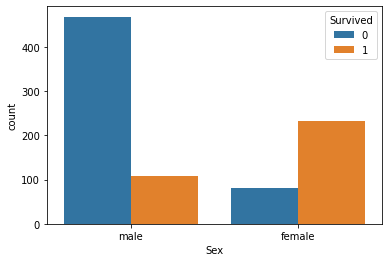

In [ ]:
# 針對幾個較重要的欄位來畫圖

import matplotlib.pyplot as plt
import seaborn as sns
#             ↓x/y決定資料直或橫向 ↓要帶入表格的值
sns.countplot(x=datas["Sex"], hue=datas["Survived"])

Text(0.5, 1.0, 'Fare V.S. Survived')

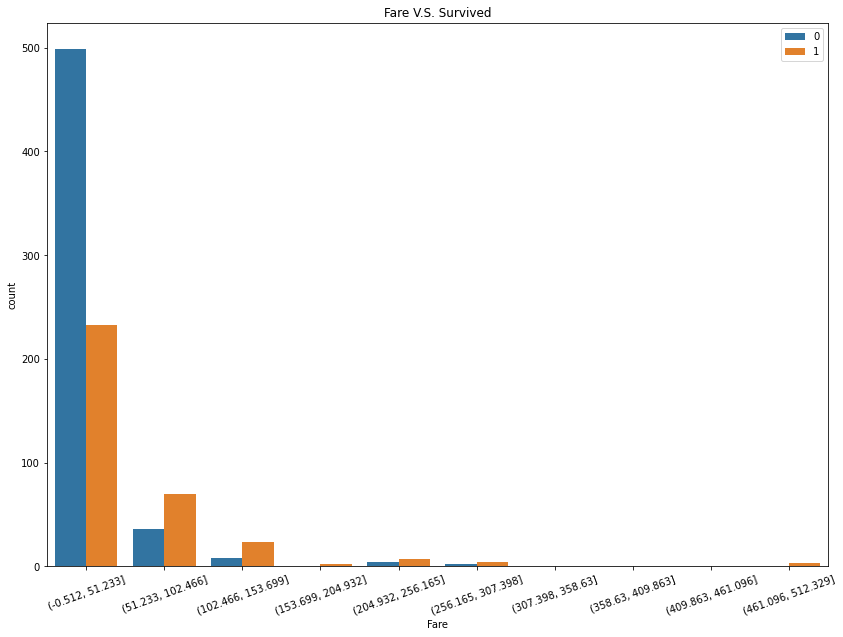

In [ ]:
from scipy.ndimage import rotate
plt.figure(figsize=(14,10))
# 先將資料分成一塊一塊的區間   ↓決定區間數
c = pd.cut(datas["Fare"], 10)
sns.countplot(x=c, hue=datas["Survived"])
# ticks 刻度/legend hue的說明/title 標題/axis x,y軸
plt.xticks(rotation=20)
plt.legend(loc="upper right")
plt.title("Fare V.S. Survived")

Text(0.5, 1.0, 'Fare V.S. Survived')

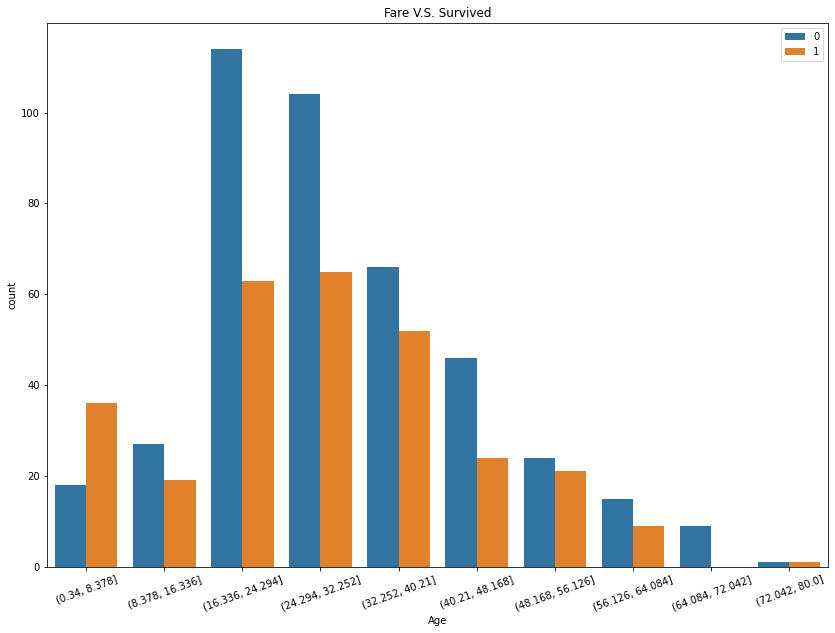

In [ ]:
plt.figure(figsize=(14,10))
c = pd.cut(datas["Age"], 10)
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")
plt.title("Fare V.S. Survived")

In [ ]:
# 討論2. kNN/RF
# kNN: 局部性演算法, 優勢是啟動資料需要比較少
# RF: 全局性演算法, 優勢如果是資料夠多的時候, 效果應該不錯
# RF: 最大的優點是有feature_importance

In [ ]:
# 討論3. kNN
# 我沒有什麼去掉相關性高的欄位, Sex其實我是算了兩次(sex, mr/mrs)
# 在實際上, 不會特別去手動去掉欄位(因為你算個三次, 又怎麼了?)